# Interact with lerepi
This notebook serves as starting point on how to interact with D.lensalot interactively, i.e. Jobs are loaded and all D.lensalot object are accessible

# Header

In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from lenscarf.run import run
fn = '/pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_90/ILC_Matthieu_Dec21_91_OBDtrunc200_highcut5/s91.py'
interactive = run(config=fn, job_id='MAP_lensrec')

INFO:: 07-22 03:51:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_90/ILC_Matthieu_Dec21_91_OBDtrunc200_highcut5/s91.py
MSC: using scarf with 1 OMP threads
INFO:: 07-22 03:51:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 07-22 03:51:: lenscarf.lerepi.core.handler.log - store() Started
INFO:: 07-22 03:51:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_90/ILC_Matthieu_Dec21_91_OBDtrunc200_highcut5/s91.py
INFO:: 07-22 03:51:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 07-22 03:51:: root.store - config file look the same. Resuming where I left off last time.
INFO:: 07-22 03:51:: root.store - Matching config file found. Resuming where I left off.
INFO:: 07-22 03:51:: lenscarf.lerepi.core.handler.log - store() Finished
INFO:: 07-22 03:51:: lenscarf.lerepi.core.handler.log - collect_jobs() Started
INFO:: 07-22 03:51:: 

## Now you have full access to all D.lensalot objects 

In [3]:
interactive.job.__dict__

{'dlm_mod_bool': -1,
 'temp_suffix': 'highcut2',
 'TEMP': '/pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_90/ILC_Matthieu_Dec21_91_OBDtrunc200_highcut2',
 'overwrite_libdir': None,
 'tr': 16,
 'version': 'noMF',
 'k': 'p_p',
 'itmax': 10,
 'simidxs_mf': array([], dtype=int64),
 'Nmf': 0,
 'zbounds': (-1, 1),
 'zbounds_len': (-1, 1),
 'pb_ctr': 0,
 'pb_extent': 6.283185307179586,
 'lensres': 1.7,
 'Lmin': 2,
 'lmax_filt': 2048,
 'lmax_ivf': 2048,
 'lmin_ivf': 2,
 'mmax_ivf': 2048,
 'mmin_ivf': 2,
 'lmax_unl': 2048,
 'mmax_unl': 2048,
 'nlev_t': array([15.55054703, 15.20572886, 14.86427291, ...,  0.15877118,
         0.18100636,  0.20225695]),
 'nlev_p': array([15.55054703, 15.20572886, 14.86427291, ...,  0.15877118,
         0.18100636,  0.20225695]),
 'cls_unl': {'tt': array([0.00000000e+00, 3.15384486e+03, 1.08426834e+03, ...,
         9.66229400e-10, 9.65260803e-10, 9.64292720e-10]),
  'ee': array([0.00000000e+00, 0.00000000e+00, 3.62414129e-02, ...,
         2.00006407e-12, 1.994234

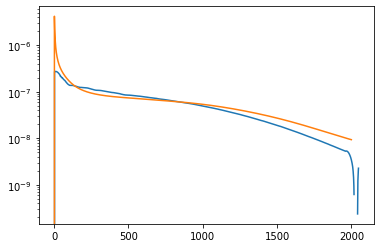

In [14]:
plt.plot(interactive.job.nlev_p*1e-7)
noise_j = np.loadtxt("/pscratch/sd/s/sebibel/data/pico/noise/Clsmooth_julien.npy")
plt.plot(noise_j)
plt.yscale('log')
# np.sqrt(val) * (60 * 180 / np.pi)

In [19]:
hp.Alm.getlmax(2100225, 2000)

-1

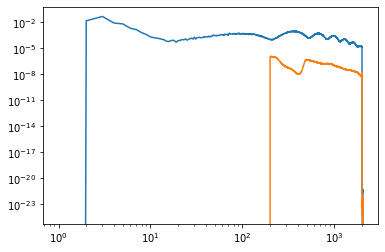

In [3]:
plt.plot(hp.alm2cl(interactive.job.dlensalot_model.ivfs.get_sim_emliklm(1)))
plt.plot(hp.alm2cl(interactive.job.dlensalot_model.ivfs.get_sim_bmliklm(1)))
plt.xscale('log')
plt.yscale('log')
# job.dlensalot_model.cinv_p

In [4]:
from lenscarf.utils import read_map
hp.mollview(read_map(job.dlensalot_model.cinv_p.ninv))#-read_map(parfile.cinv_p.ninv))

NameError: name 'job' is not defined

In [5]:
job.dlensalot_model.cinv_p.__dict__

{'lib_dir': '/global/cscratch1/sd/sebibel/cmbs4/08d_00_rNone_isOBD_MF100_OBDtest2/cinv_p',
 'lmax': 3000,
 'nside': 2048,
 'cl': {'tt': array([0.00000000e+00, 3.15384486e+03, 1.08437306e+03, ...,
         4.73193243e-08, 4.72884497e-08, 4.72312005e-08]),
  'ee': array([0.00000000e+00, 0.00000000e+00, 3.62435072e-02, ...,
         5.94198156e-10, 5.93471562e-10, 5.93194004e-10]),
  'bb': array([0.00000000e+00, 0.00000000e+00, 1.97459570e-06, ...,
         3.76402516e-10, 3.76293414e-10, 3.75748914e-10]),
  'te': array([ 0.00000000e+00,  0.00000000e+00,  2.93875049e+00, ...,
         -7.69387920e-10, -7.68650143e-10, -7.67912762e-10])},
 'transf': array([1.        , 0.99999992, 0.99999976, ..., 0.69566554, 0.69549715,
        0.69532874]),
 'ninv': [[array([8.47641977]),
   '/global/cscratch1/sd/sebibel/cmbs4/08d_ninv_truncified.fits']],
 'n_inv_filt': <plancklens.qcinv.util.jit at 0x155511d5a8d0>,
 'chain': <plancklens.qcinv.util.jit at 0x155511d5a610>}

In [6]:
interactive.job.nlev_t

array([15.55054703, 15.20572886, 14.86427291, ...,  0.15877118,
        0.18100636,  0.20225695])